## Numpy 线性代数模块 linalg 简介

Numpy 中的模块 `numpy.linalg` 提供了很多线性代数中的函数，如

- 矩阵求逆


- 计算行列式


- 求特征值与特征向量


- 矩阵分解，如奇异值分解


- 矩阵条件数以及求解线性方程组


- 求解最小二乘法问题等。

不同语言、程序包的线性代数函数对比

https://github.com/scalanlp/breeze/wiki/Linear-Algebra-Cheat-Sheet

In [104]:
import numpy as np
import numpy.linalg as nla

### 矩阵创建

- np.mat 创建矩阵或者直接创建数组 np.array

In [159]:
A = np.mat('0 1 2;1 2 3;3 2 10')
A

matrix([[ 0,  1,  2],
        [ 1,  2,  3],
        [ 3,  2, 10]])

In [160]:
A_np = np.array([[0, 1, 2],
                 [1, 2, 3],
                 [3, 2, 10]])
A_np

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 3,  2, 10]])

### 求逆矩阵

- 使用 inv 函数计算逆矩阵

In [161]:
A_inv = nla.inv(A)
A_inv

matrix([[-1.55555556,  0.66666667,  0.11111111],
        [ 0.11111111,  0.66666667, -0.22222222],
        [ 0.44444444, -0.33333333,  0.11111111]])

In [162]:
A_np_inv = nla.inv(A_np)
A_np_inv

array([[-1.55555556,  0.66666667,  0.11111111],
       [ 0.11111111,  0.66666667, -0.22222222],
       [ 0.44444444, -0.33333333,  0.11111111]])

In [163]:
A * A_inv

matrix([[ 1.00000000e+00,  1.11022302e-16,  0.00000000e+00],
        [-2.22044605e-16,  1.00000000e+00,  6.93889390e-17],
        [-4.44089210e-16, -4.44089210e-16,  1.00000000e+00]])

In [164]:
A * A_np_inv

matrix([[ 1.00000000e+00,  1.11022302e-16,  0.00000000e+00],
        [-2.22044605e-16,  1.00000000e+00,  6.93889390e-17],
        [-4.44089210e-16, -4.44089210e-16,  1.00000000e+00]])

### 求解线性方程组

In [165]:
# 列向量 b
b1 = np.array([[6],[-1],[2]]) 
b1 

array([[ 6],
       [-1],
       [ 2]])

In [166]:
# x1 = A^-1 b1
x1 = np.dot(A_inv, b1)
x1

matrix([[-9.77777778],
        [-0.44444444],
        [ 3.22222222]])

验证解

In [167]:
A @ x1

matrix([[ 6.],
        [-1.],
        [ 2.]])

In [168]:
np.dot(A, x1)

matrix([[ 6.],
        [-1.],
        [ 2.]])

In [171]:
# 所有元素都接近则返回 True
np.allclose(np.dot(A, x1), b1)

True

对方程右端作一个小的扰动

In [169]:
b2 = np.array([[6],[-1],[2.0001]]) 
b2 

array([[ 6.    ],
       [-1.    ],
       [ 2.0001]])

In [170]:
# x2 = A^-1 b2
x2 = np.dot(A_inv, b2)
x2

matrix([[-9.77776667],
        [-0.44446667],
        [ 3.22223333]])

#### 比较上面两个方程的解

- 或者直接用矩阵乘法 @

In [115]:
A_inv @ b2

matrix([[-9.77776667],
        [-0.44446667],
        [ 3.22223333]])

- `numpy.linalg` 中的函数 `solve` 可以直接求解形如 `Ax = b` 的线性方程组，其中 `A` 为矩阵，`b` 为列向量或矩阵（即多个列向量），`x` 为待求的未知量。

In [116]:
x3 = nla.solve(A, b1) 
x3

array([[-9.77777778],
       [-0.44444444],
       [ 3.22222222]])

可以批量求解同一个系数矩阵的一系列方程组

In [117]:
x34 = nla.solve(A, [b1,b2]) 
x34

array([[[-9.77777778],
        [-0.44444444],
        [ 3.22222222]],

       [[-9.77776667],
        [-0.44446667],
        [ 3.22223333]]])

### 求解一个特殊的方程组

In [172]:
B = np.mat('0 1 2;1 2 3;3 2 1')
B

matrix([[0, 1, 2],
        [1, 2, 3],
        [3, 2, 1]])

In [173]:
x1 = nla.solve(B, b1) 
x1

array([[ 1.78096894e+16],
       [-3.56193789e+16],
       [ 1.78096894e+16]])

In [174]:
B_inv = nla.inv(B)
B_inv

matrix([[ 2.45650889e+15, -1.84238167e+15,  6.14127222e+14],
        [-4.91301778e+15,  3.68476333e+15, -1.22825444e+15],
        [ 2.45650889e+15, -1.84238167e+15,  6.14127222e+14]])

In [175]:
x2 = np.dot(B_inv, b1)
x2

matrix([[ 1.78096894e+16],
        [-3.56193789e+16],
        [ 1.78096894e+16]])

验证解

In [176]:
np.dot(B, x1)

matrix([[4.],
        [8.],
        [6.]])

是不是结果与 b1 不同！

In [177]:
np.allclose(np.dot(B, x1), b1)

False

#### 查看矩阵的秩

In [123]:
rank = nla.matrix_rank(B)
rank

2

发现问题了

#### 查看矩阵的条件数

In [124]:
np.linalg.cond(B)

1.4986581371025982e+16

### 计算行列式

In [125]:
A_det, B_det = nla.det(A), nla.det(B)
A_det, B_det

(-9.000000000000002, -1.6283271027835654e-15)

In [126]:
A_inv_det, B_inv_det = nla.det(A_inv), nla.det(B_inv)
A_inv_det, B_inv_det

(-0.11111111111111109, -642042095637530.5)

In [127]:
A_det*A_inv_det, B_det*B_inv_det

(1.0, 1.045454545454549)

### 矩阵的秩和迹

In [16]:
# 矩阵的秩
print("Rank of A:", nla.matrix_rank(A))

# 矩阵的迹
print("\nTrace of A:", np.trace(A))

Rank of A: 2

Trace of A: 3


### 特征值与特征向量

In [128]:
a, u = nla.eig(A)

In [129]:
a

array([11.31077192, -0.61166024,  1.30088832])

In [130]:
u

matrix([[ 0.1923179 ,  0.96326827, -0.24999334],
        [ 0.31960842, -0.07149569, -0.92124386],
        [ 0.92782772, -0.2588486 ,  0.29801523]])

- 验证 $Au = \lambda u$

In [131]:
A @ u[:,0]

matrix([[ 2.17526387],
        [ 3.6150179 ],
        [10.49444777]])

In [132]:
a[0]*u[:,0]

matrix([[ 2.17526387],
        [ 3.6150179 ],
        [10.49444777]])

### 矩阵范数

x_norm = np.linalg.norm(x, ord=None, axis=None, keepdims=False)

#### 计算矩阵或向量范数。

此函数根据 `ord` 参数的值上返回 8 个矩阵范数之一，或无数个向量范数之一。

|ord | norm for matrices |            norm for vectors|
|:-|:-:|-:|
|None  | Frobenius norm    |            2-norm|
|'fro' | Frobenius norm    |            --|
|'nuc' | nuclear norm      |            --|
|inf   | max(sum(abs(x), axis=1))  |    max(abs(x)) |
|-inf  | min(sum(abs(x), axis=1))  |    min(abs(x)) |
|0     | --                        |    sum(x != 0) |
|1     | max(sum(abs(x), axis=0))  |    as below    |
|-1    | min(sum(abs(x), axis=0))  |    as below    |
|2     | 2-norm (largest sing. value)|  as below    |
|-2    | smallest singular value   |    as below    |
|other | --                        |    sum(abs(x)\*\*ord)\*\*(1./ord)|

#### 常用范数举例

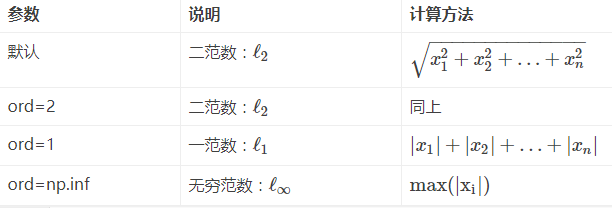

- 向量范数

In [22]:
a = np.arange(5) - 2
a

array([-2, -1,  0,  1,  2])

In [23]:
nla.norm(a)

3.1622776601683795

In [24]:
nla.norm(a, ord=2)

3.1622776601683795

In [25]:
nla.norm(a, np.inf)

2.0

In [26]:
nla.norm(a, -np.inf)

0.0

In [27]:
nla.norm(a, ord=100)

2.0139111001134378

- 使用 `axis` 参数对矩阵计算向量范数

In [28]:
C = np.array(([[0, 1, 2],
               [1, 2, 3],
               [3, 2, 1]]))

In [29]:
nla.norm(C, axis=0)

array([3.16227766, 3.        , 3.74165739])

In [30]:
nla.norm(C, axis=1)

array([2.23606798, 3.74165739, 3.74165739])

In [31]:
nla.norm(C, ord=1, axis=1)

array([3., 6., 6.])

- 矩阵范数

In [32]:
nla.norm(C)

5.744562646538029

In [33]:
nla.norm(C, 'fro')

5.744562646538029

In [34]:
nla.norm(C, 2)

5.223210633932344

In [35]:
nla.norm(C, np.inf)

6.0

In [36]:
nla.norm(C, -np.inf)

3.0

- 再看矩阵条件数

$$
\kappa(A)=\|A\|\|A^{-1}\|\\[1.0em]
=\frac{\sigma_{max}(A)}{\sigma_{min}(A)}
$$

矩阵的条件数用于界定一个矩阵是`良态的`还是`病态的`，一般来说，条件数越大，矩阵越接近一个奇异矩阵（不可逆矩阵），矩阵越`病态`。在数值计算中，矩阵的条件数越大，计算的误差越大，精度越低。

In [38]:
nla.norm(C, 'fro') * nla.norm(nla.inv(C), 'fro')

4.406336069451602e+16

In [39]:
nla.cond(C, 2)

1.4986581371025982e+16

In [41]:
nla.norm(C, 2) / nla.norm(C, -2)

1.4986581371025982e+16

### 矩阵奇异值分解

矩阵 ${\bf A}$，不管是否为方阵，都可以被分解成三个矩阵的乘积，



$$
{\bf A}={\bf U \Sigma V}^{\top}
$$

具体展开为，


$$
{\bf A}={\bf U \Sigma V}^{\top}=\left[\begin{array}{llll}
{\bf u}_{1} & {\bf u}_{2} & \cdots & {\bf u}_{n}
\end{array}\right]\left[\begin{array}{cccc}
\sigma_{1} & & & \\
& \sigma_{2} & & \\
& & \ddots & \\
& & & \sigma_{n}
\end{array}\right]\left[\begin{array}{c}
{\bf v}_{1}^{\top} \\
{\bf v}_{2}^{\top} \\
\vdots \\
{\bf v}_{n}^{\top}
\end{array}\right]
$$



例如，


$$
\left[\begin{array}{ll}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{array}\right]=\left[\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{array}\right]\left[\begin{array}{cc}
\sigma_{1} & 0\\
0 & \sigma_{2}
\end{array}\right]\left[\begin{array}{cc}
\cos \phi & \sin \phi \\
-\sin \phi & \cos \phi
\end{array}\right]
$$

In [42]:
U, S, V = nla.svd(C, 1, 1)

In [43]:
U

array([[-0.36039049, -0.50471188, -0.78446454],
       [-0.68982216, -0.42189044,  0.58834841],
       [-0.62790452,  0.75317619, -0.19611614]])

In [44]:
V

array([[-0.49271146, -0.57356367, -0.65441588],
       [ 0.76848471,  0.06601555, -0.63645361],
       [-0.40824829,  0.81649658, -0.40824829]])

In [45]:
S

array([5.22321063e+00, 2.39124877e+00, 3.48525825e-16])

- 验证 C = U @ S @ V

In [48]:
U @ np.diag(S) @ V

array([[5.42493685e-16, 1.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 1.00000000e+00]])

In [47]:
U.dot(np.diag(S)).dot(V)

array([[5.42493685e-16, 1.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 1.00000000e+00]])

- 用奇异值计算条件数

In [49]:
S[0] / S[2]

1.4986581371025984e+16

### Cholesky 分解

对称正定矩阵的 Cholesky 分解

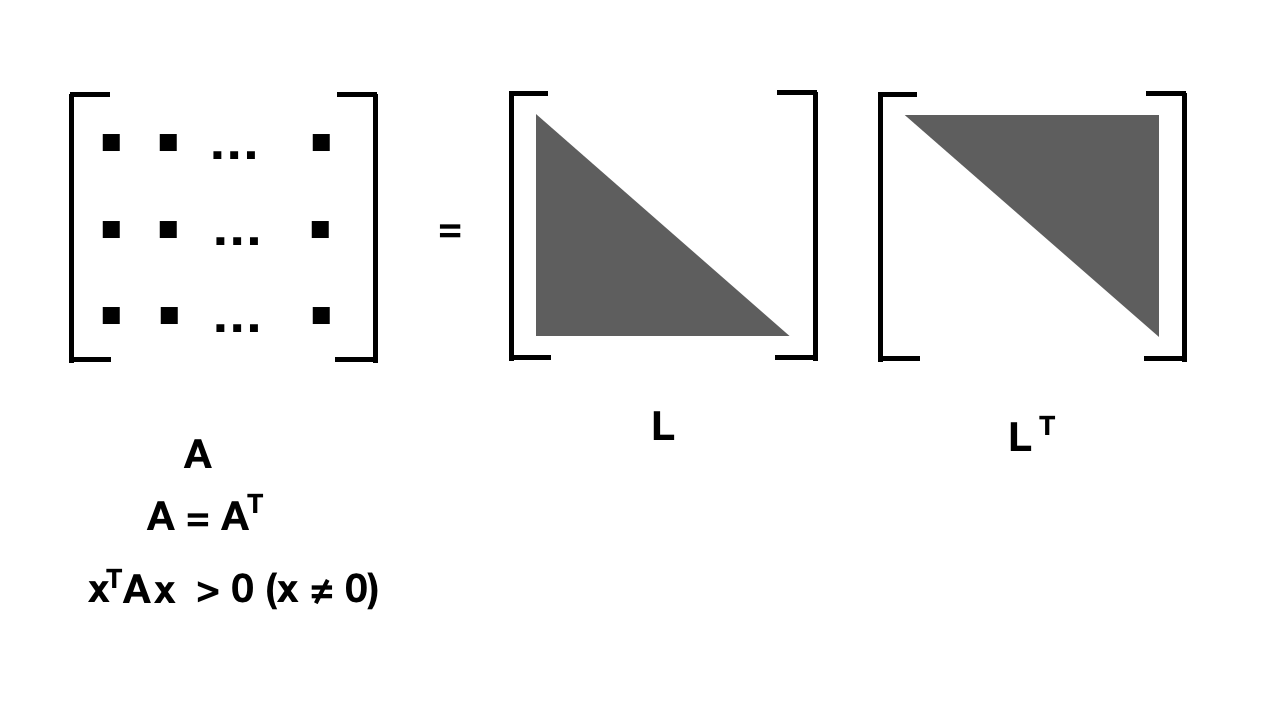

可以先试试对一般矩阵的 Cholesky 分解。

In [ ]:
nla.cholesky(C)

In [ ]:
nla.cholesky(C.T@C)

In [54]:
B = np.array(([[0, 1, 2],
               [1, 2, 3],
               [3, 2, 10]]))

nla.matrix_rank(B)

3

- 构造对称正定矩阵

In [ ]:
A = B.T@B

- 对 A 作 Cholesky 分解

In [64]:
L = nla.cholesky(A)
L

array([[ 3.16227766,  0.        ,  0.        ],
       [ 2.52982213,  1.61245155,  0.        ],
       [10.43551628,  0.99227788,  1.76504522]])

- 查看原矩阵与分解结果

In [65]:
A

array([[ 10,   8,  33],
       [  8,   9,  28],
       [ 33,  28, 113]])

In [63]:
L @ L.T

array([[ 10.,   8.,  33.],
       [  8.,   9.,  28.],
       [ 33.,  28., 113.]])

In [61]:
np.dot(L, L.T.conj())

array([[ 10.,   8.,  33.],
       [  8.,   9.,  28.],
       [ 33.,  28., 113.]])

### 课堂练习

用 cholesky 分解来解如下方程 $Ax = b$。

In [154]:
A = np.array([[5., -1.,2., 0.1],
              [-1.,7., -1.,3.],
              [2., -1.,11.,-1.],
              [0.1, 3., -1.,15.]])

b = np.array([5., 2., -1., 5.])

L = ?

y = ?
x = ?

array([ 1.15722069,  0.30934039, -0.25073328,  0.2470349 ])

In [155]:
# 比较
x = nla.solve(A, b) 
x

array([ 1.15722069,  0.30934039, -0.25073328,  0.2470349 ])

### 矩阵的伪逆

非方阵的矩阵没有逆矩阵，但有伪逆。

In [143]:
E = np.mat('1 3 5; 7 -2 2')
E

matrix([[ 1,  3,  5],
        [ 7, -2,  2]])

In [144]:
E_pinv = nla.pinv(E)
E_pinv

matrix([[-0.01067236,  0.1248666 ],
        [ 0.10298826, -0.05496265],
        [ 0.14034152,  0.00800427]])

In [148]:
E.dot(E_pinv)

matrix([[1.00000000e+00, 3.98986399e-17],
        [2.22044605e-16, 1.00000000e+00]])